# **Prediction Using Decision Tree Algorithm on Iris Dataset**

# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
dataset =pd.read_csv("/content/Iris.csv")

In [ ]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Displaying the basic statistics about data

In [ ]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Displaying the information regarding the data type

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Displaying the number of sample for each class

In [ ]:
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Checking for the null values

In [ ]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Displaying the number of rows and columns

In [ ]:
dataset.shape

(150, 6)

# Visualizing the data

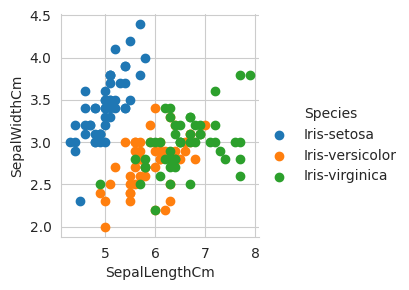

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue = 'Species').map(plt.scatter, 'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

# Scatterplot for the different features of flower

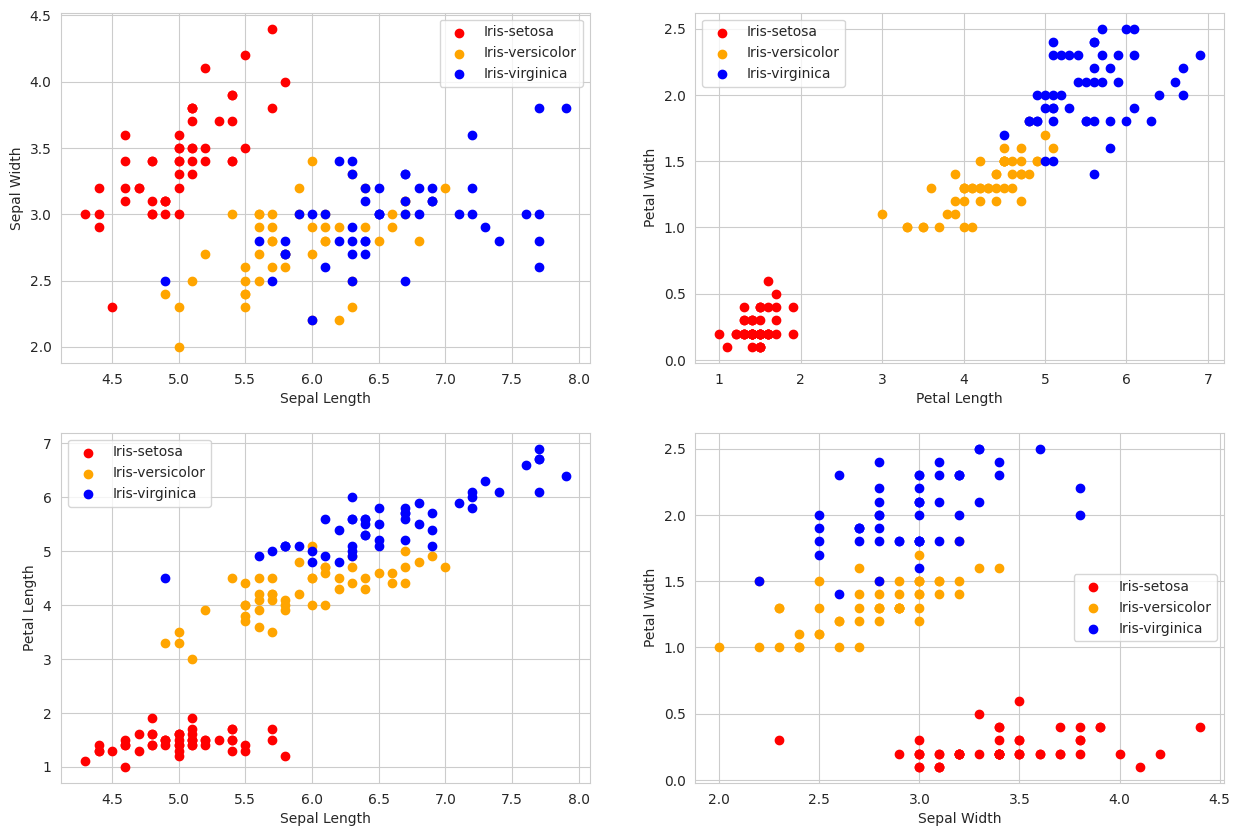

In [ ]:
colors = ['red', 'orange', 'blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
for i in range(3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

plt.subplot(2,2,2)
for i in range(3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

plt.subplot(2,2,3)
for i in range(3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

plt.subplot(2,2,4)
for i in range(3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

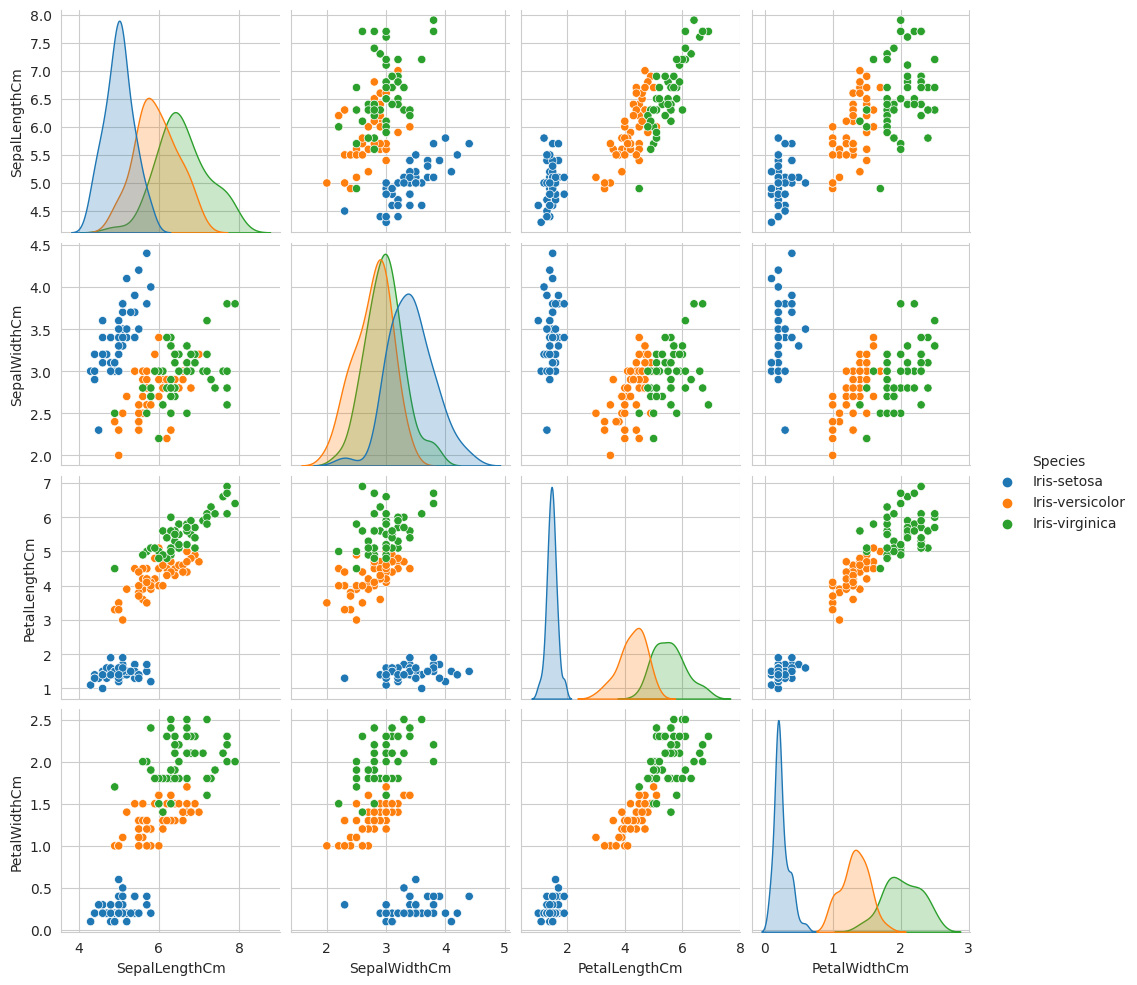

In [ ]:
sns.pairplot(dataset.drop(['Id'],axis=1), hue='Species')
plt.show()

In [ ]:
dataset['Sepal_diff'] = dataset['SepalLengthCm'] - dataset['SepalWidthCm']
dataset['Petal_diff'] = dataset['PetalLengthCm'] - dataset['PetalWidthCm']

In [ ]:
dataset['Sepal_Petal_Len_diff'] = dataset['SepalLengthCm'] - dataset['PetalLengthCm']
dataset['Sepal_Petal_Wid_diff'] = dataset['SepalWidthCm'] - dataset['PetalWidthCm']

In [ ]:
dataset['Sepal_Petal_Len_Wid_diff'] = dataset['SepalLengthCm'] - dataset['PetalWidthCm']
dataset['Sepal_Petal_Wid_Len_diff'] = dataset['SepalWidthCm'] - dataset['PetalLengthCm']

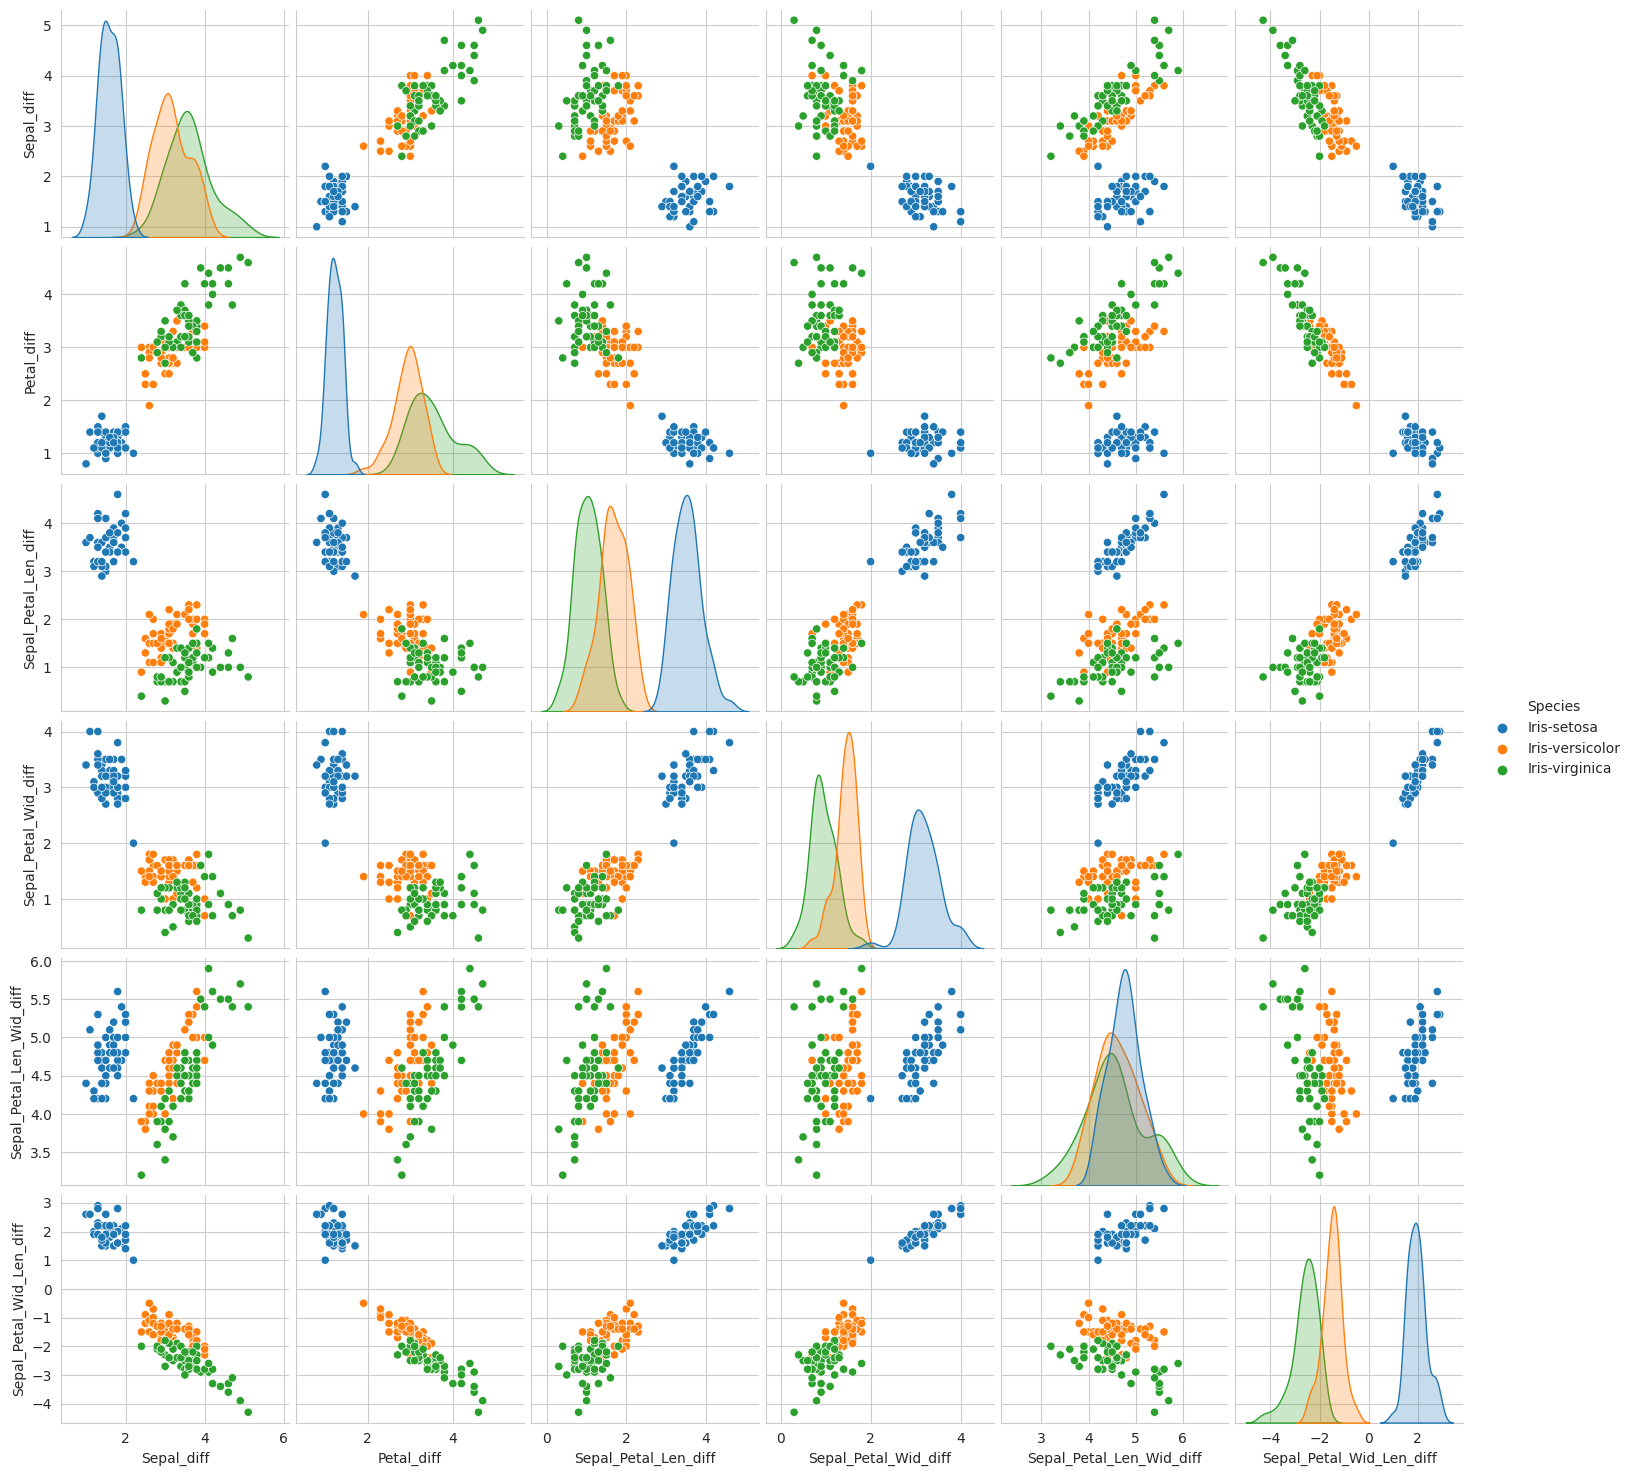

In [ ]:
sns.pairplot(dataset[['Species', 'Sepal_diff', 'Petal_diff', 'Sepal_Petal_Len_diff','Sepal_Petal_Wid_diff', 'Sepal_Petal_Len_Wid_diff', 'Sepal_Petal_Wid_Len_diff']], hue='Species')
plt.show()

In [ ]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff,Sepal_Petal_Len_diff,Sepal_Petal_Wid_diff,Sepal_Petal_Len_Wid_diff,Sepal_Petal_Wid_Len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1.5,1.3,3.7,3.5,5.0,2.2
6,7,4.6,3.4,1.4,0.3,Iris-setosa,1.2,1.1,3.2,3.1,4.3,2.0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1.6,1.3,3.5,3.2,4.8,1.9
8,9,4.4,2.9,1.4,0.2,Iris-setosa,1.5,1.2,3.0,2.7,4.2,1.5
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1.8,1.4,3.4,3.0,4.8,1.6


# Dropping the Id column which is not required while classifying the labels

In [ ]:
dataset.drop(['Id'],axis = 1,inplace = True)

In [ ]:
dataset.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff,Sepal_Petal_Len_diff,Sepal_Petal_Wid_diff,Sepal_Petal_Len_Wid_diff,Sepal_Petal_Wid_Len_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
5,5.4,3.9,1.7,0.4,Iris-setosa,1.5,1.3,3.7,3.5,5.0,2.2
6,4.6,3.4,1.4,0.3,Iris-setosa,1.2,1.1,3.2,3.1,4.3,2.0
7,5.0,3.4,1.5,0.2,Iris-setosa,1.6,1.3,3.5,3.2,4.8,1.9
8,4.4,2.9,1.4,0.2,Iris-setosa,1.5,1.2,3.0,2.7,4.2,1.5
9,4.9,3.1,1.5,0.1,Iris-setosa,1.8,1.4,3.4,3.0,4.8,1.6


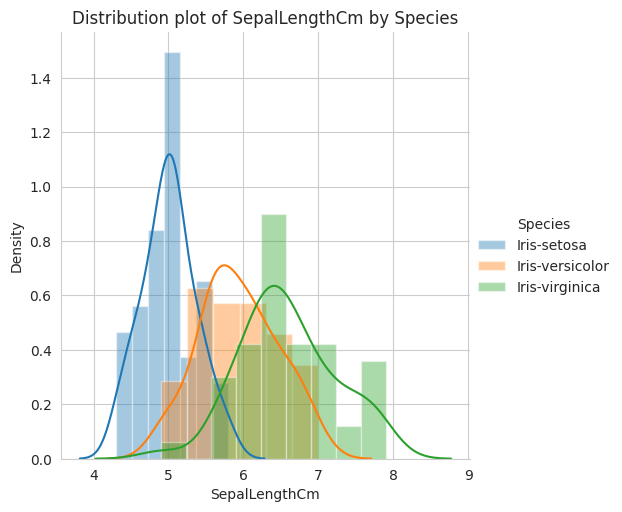

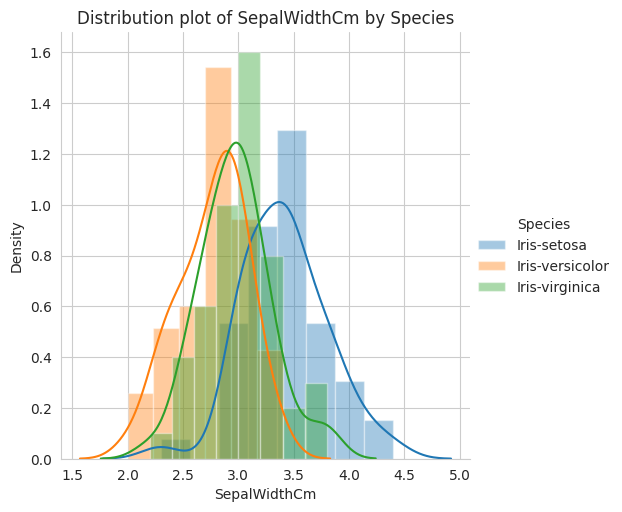

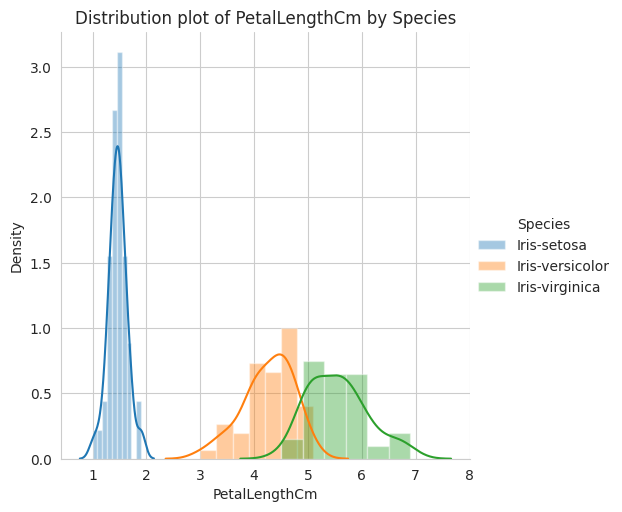

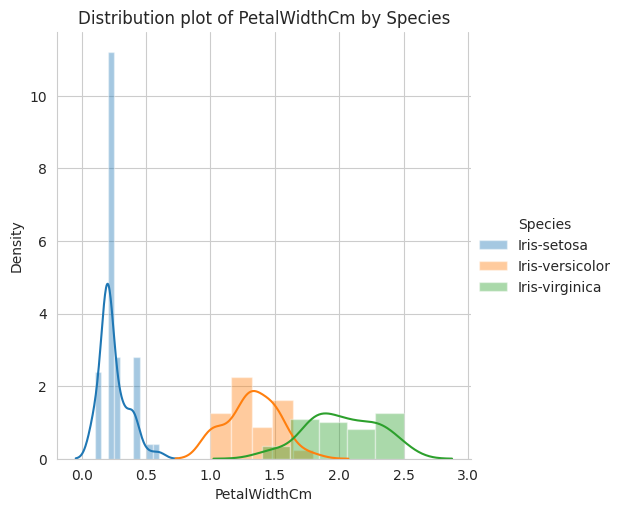

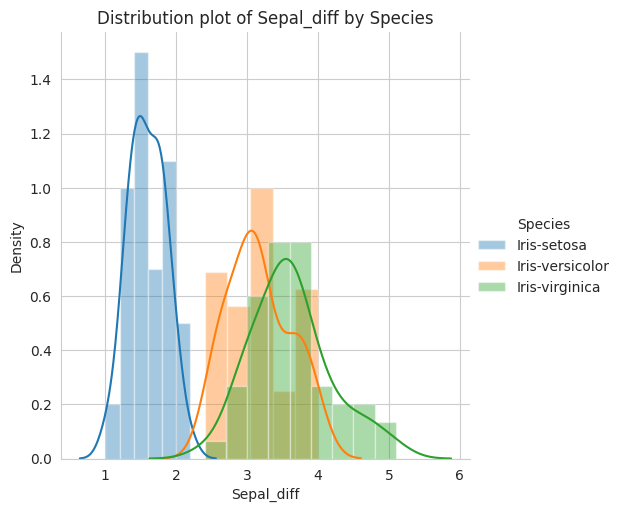

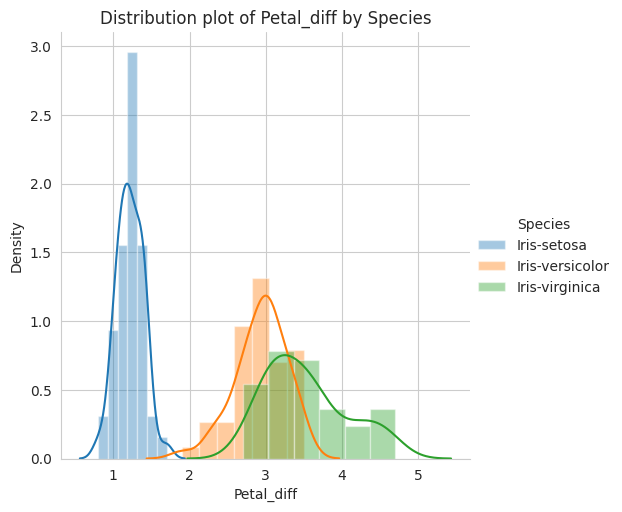

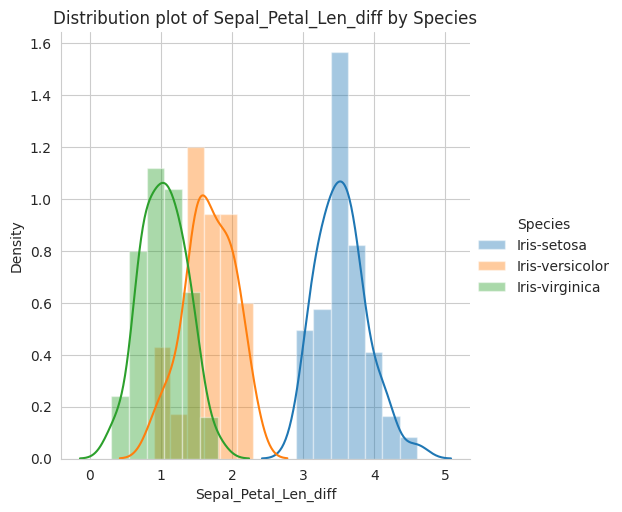

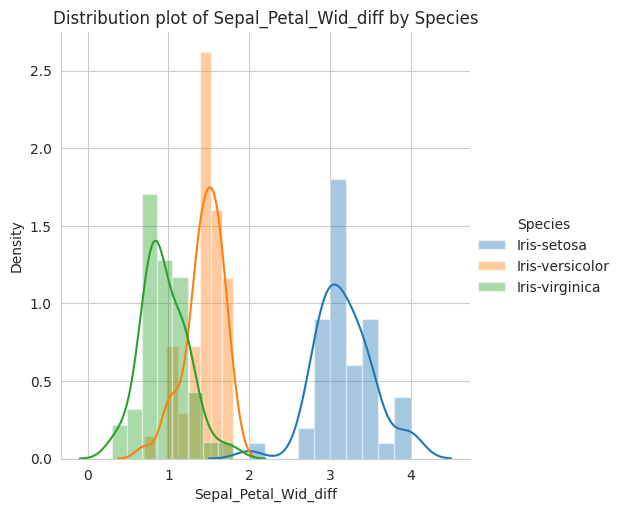

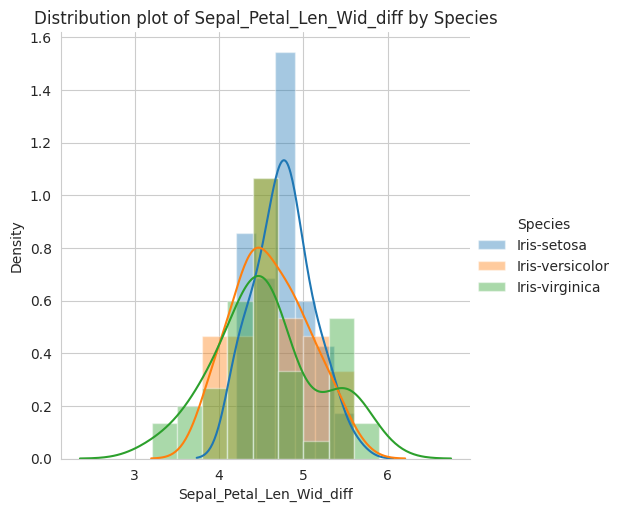

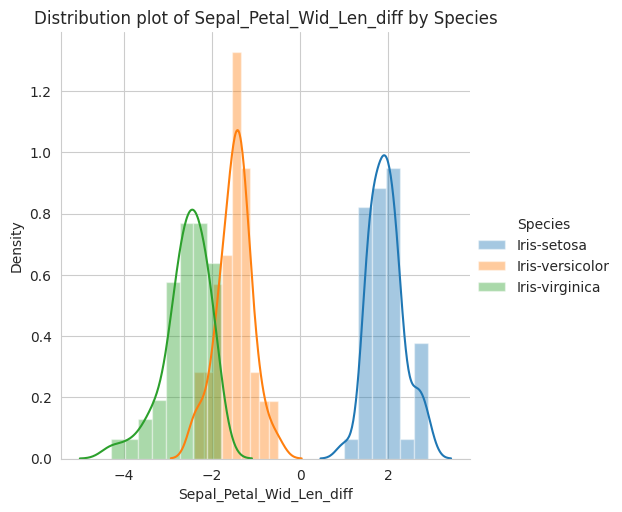

In [ ]:
for feature in dataset.columns:
    if feature == 'Species':
        continue

    sns.set_style('whitegrid')
    g = sns.FacetGrid(dataset, hue='Species', height=5)
    g.map(sns.distplot, feature).add_legend()
    plt.title(f"Distribution plot of {feature} by Species")
    plt.show()

# Building the decision tree classifier algorithm

In [ ]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
x = dataset[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = dataset['Species']

# Spliting the dataset into training and testing

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Splitting the dataset into validation training and testing

In [ ]:
xt, xv, yt, yv = train_test_split(X_train, Y_train, test_size=0.10, random_state=42)

In [ ]:
Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(xt, yt)

DecisionTreeClassifier()

[Text(0.375, 0.9285714285714286, 'x[2] <= 2.6\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(0.25, 0.7857142857142857, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.5, 0.7857142857142857, 'x[3] <= 1.55\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(0.25, 0.6428571428571429, 'x[2] <= 5.0\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.6428571428571429, 'x[2] <= 5.05\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(0.625, 0.5, 'x[1] <= 2.9\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.5, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.75, 0.35714285714285715, 'x[2] <= 4.9\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.625, 0.21428571428571427, 'x[0] <= 5.95\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.5, 0.07142857142857142, 'gini = 0.0\nsamp

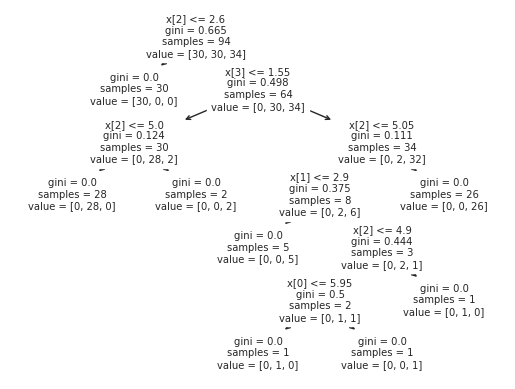

In [ ]:
tree.plot_tree(Iris_clf)

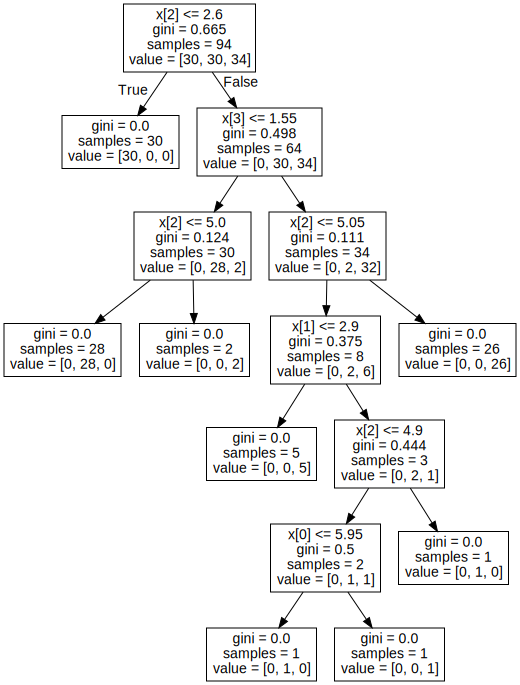

In [ ]:
dot_data = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [ ]:
print('Accuracy score is:',cross_val_score(Iris_clf, xt, yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9361559139784946


# Check the validation data

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(xv)


print('Accuracy score for validation test data is:',accuracy_score(yv, Y_hat))
multilabel_confusion_matrix(yv, Y_hat)

Accuracy score for validation test data is: 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]])

In [ ]:
YT_hat = Iris_clf.predict(X_test)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Y_test, YT_hat)*100,'%')
multilabel_confusion_matrix(Y_test , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 95.55555555555556 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 2, 11]],

       [[30,  2],
        [ 0, 13]]])